<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Random Forest and XGboost <br>
<font color=696880 size=4>
    Bahar Oveisgharan (bahar.oveis.2000@gmail.com) <br>
    Ghazal Farahani (farahaniqazal@gmail.com)

____


### Full Name : Javad Razi
### Student Number : 401204354
__

### Breast Cancer
Most of us know someone who struggled with breast cancer, or at least heard about the struggles facing patients who are fighting against breast cancer.The most important part of a process of clinical decision-making in patients with cancers, in general, is the accurate estimation of prognosis and survival duration. Breast cancer patients with the same stage of the disease and the same clinical characteristics can have different treatment responses and overall survival.
In this practical assignment, you are going to train a Random Forest and XGBoost model on <code>breast_cancer.csv</code> dataset.

Import all the libraries you may need here

In [60]:
import sklearn
import pandas as pd
import xgboost as xgb

#### Loading the Data

In [61]:
from sklearn import set_config

set_config(transform_output="pandas")
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", None)

# Load the dataset into a pandas dataframe
df = pd.read_csv("breast_cancer.csv")

### Data Exploration
#### Let's start off by exploring the files we just imported. it's not necessary to do any visualization just a statistical summary of the data would be enough. split your data to train and test.

In [62]:
from sklearn.model_selection import train_test_split


X = df.drop("overall_survival", axis=1)
y = df["overall_survival"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=92847
)

# Display a statistical summary of the data
print("Training set summary:")
print(X_train.describe())
print("*" * 20)
print("Test set summary:")
print(X_test.describe())

Training set summary:
       Unnamed: 0  age_at_diagnosis  chemotherapy       cohort  neoplasm_histologic_grade  hormone_therapy  lymph_nodes_examined_positive  mutation_count  nottingham_prognostic_index  radio_therapy   tumor_size  tumor_stage
count  1523.00000       1523.000000   1523.000000  1523.000000                1523.000000      1523.000000                    1523.000000     1523.000000                  1523.000000    1523.000000  1523.000000  1523.000000
mean    959.58306         61.128431      0.210112     2.655942                   2.415709         0.621799                       2.017728        5.782804                     4.034162       0.598162    26.255389     1.752605
std     552.72670         12.956723      0.407521     1.222789                   0.635067         0.485097                       4.109420        4.160442                     1.132175       0.490431    15.103027     0.546869
min       1.00000         21.930000      0.000000     1.000000                   1

### Data Preparation
#### Creating two custom transformers to put on our pipeline:
* To split the data into categorical and numerical features and
* To preprocess the categorical features. 
* Create the X feature matrix and the y target vector.
* split the data.

In [63]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas dataframe
df = pd.read_csv("breast_cancer.csv").dropna()


# Define custom transformers
class CategoricalFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.select_dtypes(include=["object"])


class CategoricalPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        ohe = OneHotEncoder(
            handle_unknown="ignore", sparse_output=False, drop="if_binary"
        )
        return ohe.fit_transform(X)


# Create X feature matrix and y target vector
X = df.drop("overall_survival", axis=1)
y = df["overall_survival"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=92847
)

# Define the preprocessing pipeline
categorical_pipeline = Pipeline(
    [
        ("cat_selector", CategoricalFeatureSelector()),
        ("cat_preprocessor", CategoricalPreprocessor()),
        ("normalizer", Normalizer()),
    ]
)

numerical_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_pipeline, X.columns),
        ("num", numerical_pipeline, make_column_selector(dtype_exclude="object")),
    ],
    verbose_feature_names_out=False,
)


X_preprocessed = preprocessor.fit_transform(X, y)
y_preprocessed = y

(
    X_train_preprocessed,
    X_test_preprocessed,
    y_train_preprocessed,
    y_test_preprocessed,
) = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=92847)

X_preprocessed.head()

,type_of_breast_surgery_MASTECTOMY,cancer_type_detailed_Breast,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cellularity_High,cellularity_Low,cellularity_Moderate,pam50_+_claudin-low_subtype_Basal,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,pam50_+_claudin-low_subtype_NC,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_measured_by_snp6_GAIN,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,her2_status_measured_by_snp6_UNDEF,her2_status_Positive,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,inferred_menopausal_state_Pre,integrative_cluster_1,integrative_cluster_10,integrative_cluster_2,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,primary_tumor_laterality_Right,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MDLC,pr_status_Positive,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,Unnamed: 0,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,radio_therapy,tumor_size,tumor_stage
1,0.000000,0.0,0.277350,0.000000,0.0,0.00000,0.277350,0.0,0.000000,0.0,0.000000,0.27735,0.000000,0.0,0.0,0.0,0.277350,0.277350,0.000000,0.000000,0.277350,0.0,0.0,0.277350,0.000000,0.0,0.00000,0.0,0.0,0.0,0.27735,0.0,0.0,0.0,0.000000,0.27735,0.0,0.0,0.0,0.000000,0.0,0.000000,0.277350,0.0,0.277350,0.000000,0.0,0.00000,0.277350,0.277350,0.0,0.0,0.0,-1.787999,-1.382285,-0.505135,-1.327344,0.918582,0.787699,-0.502713,-0.903557,-0.011661,0.825479,-1.068241,-1.367789
4,0.277350,0.0,0.000000,0.000000,0.0,0.27735,0.277350,0.0,0.000000,0.0,0.000000,0.00000,0.277350,0.0,0.0,0.0,0.277350,0.277350,0.000000,0.000000,0.277350,0.0,0.0,0.000000,0.000000,0.0,0.27735,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.277350,0.277350,0.0,0.000000,0.000000,0.0,0.27735,0.277350,0.277350,0.0,0.0,0.0,-1.782329,1.210528,1.979670,-1.327344,0.918582,0.787699,1.564581,-0.903557,1.802388,0.825479,0.891764,0.449647
5,0.288675,0.0,0.288675,0.000000,0.0,0.00000,0.000000,0.0,0.288675,0.0,0.000000,0.00000,0.288675,0.0,0.0,0.0,0.288675,0.288675,0.000000,0.000000,0.288675,0.0,0.0,0.288675,0.000000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.288675,0.0,0.000000,0.000000,0.0,0.288675,0.000000,0.0,0.00000,0.288675,0.288675,0.0,0.0,0.0,-1.780440,1.348689,-0.505135,-1.327344,0.918582,0.787699,-0.502713,-0.419821,0.025324,0.825479,0.303762,4.084519
8,0.000000,0.0,0.301511,0.000000,0.0,0.00000,0.000000,0.0,0.301511,0.0,0.000000,0.00000,0.301511,0.0,0.0,0.0,0.301511,0.301511,0.301511,0.000000,0.000000,0.0,0.0,0.301511,0.000000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.301511,0.301511,0.0,0.301511,0.000000,0.0,0.00000,0.000000,0.301511,0.0,0.0,0.0,-1.774770,1.935104,-0.505135,-1.327344,0.918582,0.787699,-0.244301,-0.419821,0.879512,0.825479,-0.676240,0.449647
9,0.316228,0.0,0.000000,0.316228,0.0,0.00000,0.316228,0.0,0.000000,0.0,0.316228,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.316228,0.000000,0.316228,0.000000,0.0,0.0,0.000000,0.316228,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.316228,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,

# Implementing two different models

## Random Forest

### train the model

In [64]:
# Train a Random Forest model on the preprocessed data
from sklearn.ensemble import RandomForestClassifier

# We will store the accurary report of different models in this dictionary
model_comparison_dict = {}

rf_model = RandomForestClassifier(n_estimators=100, random_state=92847)
rf_model.fit(X_train_preprocessed, y_train_preprocessed)

RandomForestClassifier(random_state=92847)

### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.


In [65]:
from sklearn.metrics import classification_report

# For train set
y_train_pred = rf_model.predict(X_train_preprocessed)

train_clf_report = classification_report(
    y_train_preprocessed, y_train_pred, output_dict=True
)
pd.DataFrame(train_clf_report)

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,674.0,542.0,1.0,1216.0,1216.0


In [66]:
# For test set
from sklearn.metrics import accuracy_score


y_test_pred = rf_model.predict(X_test_preprocessed)

vanilla_rf_score = accuracy_score(y_test_preprocessed, y_test_pred)
model_comparison_dict['DefaultRandomForest'] = vanilla_rf_score

test_clf_report = classification_report(
    y_test_preprocessed, y_test_pred, output_dict=True
)
pd.DataFrame(test_clf_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.756757,0.596639,0.694079,0.676698,0.695659
recall,0.744681,0.612069,0.694079,0.678375,0.694079
f1-score,0.750670,0.604255,0.694079,0.677463,0.694801
support,188.000000,116.000000,0.694079,304.000000,304.000000


### Hyperparameter tuning :
#### Randomized Search Cross Validation and Grid Search Cross Validation
report best hyperparameters in each part.

In [67]:
# Define the parameter grid for Randomized Search Cross Validation
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_distributions = {
    "n_estimators": [50, 200, 500],
    "max_depth": [None, 3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

# Perform Randomized Search Cross Validation to find the best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=92847),
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    random_state=92847,
    n_jobs=-1,
    verbose=1,
    refit=True,
)
rf_random.fit(X_train_preprocessed, y_train_preprocessed)
print("Randomized Search CV best parameters:", rf_random.best_params_)
print("Randomized Search CV best score:", rf_random.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Randomized Search CV best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 5, 'bootstrap': True}
Randomized Search CV best score: 0.709748364028874


In [68]:
# Define the parameter grid for Grid Search Cross Validation
param_grid = {
    "n_estimators": [100, 150, 200],
    "max_depth": [None, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
}

# Perform Grid Search Cross Validation to find the best hyperparameters
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=38294),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit=True,
)
rf_grid.fit(X_train_preprocessed, y_train_preprocessed)
print("Grid Search CV best parameters:", rf_grid.best_params_)
print("Grid Search CV best score:", rf_grid.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Grid Search CV best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search CV best score: 0.7064966605950213


In [69]:
# Make predictions on the test data using the trained model with best hyperparameters
rf_best_cv = rf_grid if rf_grid.best_score_ > rf_random.best_score_ else rf_random

rf_best_model = RandomForestClassifier(**rf_best_cv.best_params_, random_state=92847)
rf_best_model.fit(X_train_preprocessed, y_train_preprocessed)
y_test_pred = rf_best_model.predict(X_test_preprocessed)

gs_rf_score = accuracy_score(y_test_preprocessed, y_test_pred)
model_comparison_dict['GridSearchRandomForest'] = gs_rf_score

pd.DataFrame(classification_report(y_test_preprocessed, y_test_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.752747,0.581967,0.684211,0.667357,0.687581
recall,0.728723,0.612069,0.684211,0.670396,0.684211
f1-score,0.740541,0.596639,0.684211,0.668590,0.685631
support,188.000000,116.000000,0.684211,304.000000,304.000000


In [70]:
# Comparison between RF model with default parameters, and RF model obtained 
# using the best of grid search and randomized grid search
pd.DataFrame(model_comparison_dict, index=['Accuracy'])

,DefaultRandomForest,GridSearchRandomForest
Accuracy,0.694079,0.684211


### Find important features with Random Forest model 
#### Visualize feature scores of the features

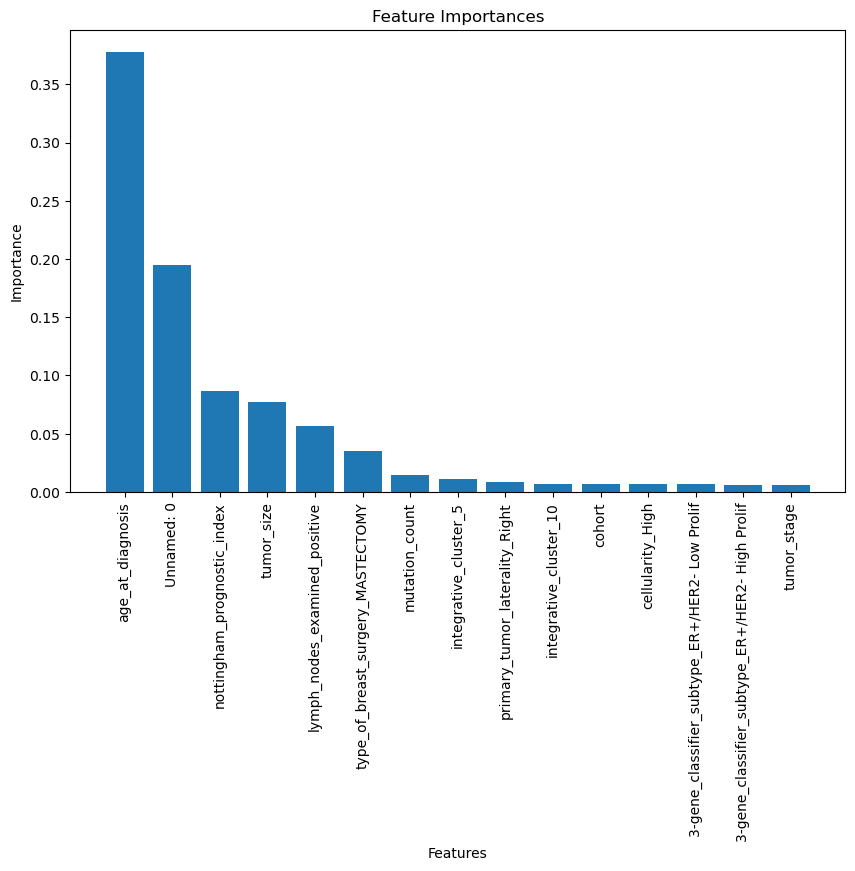

In [71]:
from matplotlib import pyplot as plt


# Get the feature importances and sort them in descending order
feature_importances = pd.DataFrame(
    rf_best_model.feature_importances_,
    index=X_preprocessed.columns,
    columns=["importance"],
).sort_values("importance", ascending=False)
feature_importances = feature_importances.iloc[:15,]

# Visualize the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. implement it and compare the results.

We use bagging ensemble method. Bagging can reduce the variance of the model by training multiple instances of the same model on different subsets of the data and aggregating their predictions.

As you can see in the classification report, the model marginally outperforms the previous best one that was obtained using grid search. 

In [72]:
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bagging_model = BaggingClassifier(
    estimator=rf_best_model, n_estimators=100, n_jobs=-1, verbose=1, random_state=92847
)
bagging_model.fit(X_train_preprocessed, y_train_preprocessed)

# Get the accuracy of the model on the test data
y_pred = bagging_model.predict(X_test_preprocessed)
improvevd_rf_accuracy = accuracy_score(y_test_preprocessed, y_pred)
model_comparison_dict['ImprovedRandomForest'] = improvevd_rf_accuracy

improved_rf_clf_report = classification_report(y_test_preprocessed, y_pred, output_dict=True)
pd.DataFrame(improved_rf_clf_report)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   39.8s remaining:  2.0min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   45.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.8s remaining:    5.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    5.7s finished


,0,1,accuracy,macro avg,weighted avg
precision,0.769231,0.606557,0.703947,0.687894,0.707158
recall,0.744681,0.637931,0.703947,0.691306,0.703947
f1-score,0.756757,0.621849,0.703947,0.689303,0.705279
support,188.000000,116.000000,0.703947,304.000000,304.000000


In [73]:
# Compare the performance of the models trained so far 
pd.DataFrame(model_comparison_dict, index=['Accuracy'])

,DefaultRandomForest,GridSearchRandomForest,ImprovedRandomForest
Accuracy,0.694079,0.684211,0.703947


## XGBoost
### Train the model

In [74]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert the data to an XGBoost DMatrix
dtrain = xgb.DMatrix(X_train_preprocessed, label=y_train_preprocessed)
dtest = xgb.DMatrix(X_test_preprocessed, label=y_test_preprocessed)

# Set the XGBoost parameters
params = {
    "max_depth": 3,
    "eta": 0.1,
    "objective": "binary:logistic",
    "eval_metric": "error",
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test data
y_pred = xgb_model.predict(dtest)
y_pred_binary = [round(pred) for pred in y_pred]

# Evaluate the accuracy of the model on the test data
vanilla_xgb_accuracy = accuracy_score(y_test_preprocessed, y_pred_binary)

print(f"Accuracy of XGBoost Model: {vanilla_xgb_accuracy}")

Accuracy of XGBoost Model: 0.6842105263157895


### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.



In [75]:
# Accuracy and Classification Report for Train Data
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = xgb_model.predict(dtrain)
y_train_pred_binary = [round(pred) for pred in y_train_pred]

# Evaluate the accuracy of the model on the train data
train_accuracy = accuracy_score(y_train_preprocessed, y_train_pred_binary)

print("Train Accuracy:", train_accuracy)

# Print the classification report
clf_report_train = classification_report(
    y_train_preprocessed, y_train_pred_binary, output_dict=True
)
pd.DataFrame(clf_report_train)

Train Accuracy: 0.8297697368421053


,0,1,accuracy,macro avg,weighted avg
precision,0.832148,0.826511,0.82977,0.829329,0.829635
recall,0.867953,0.782288,0.82977,0.825120,0.829770
f1-score,0.849673,0.803791,0.82977,0.826732,0.829223
support,674.000000,542.000000,0.82977,1216.000000,1216.000000


In [76]:
# Evaluate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test_preprocessed, y_pred_binary)

print("Test Accuracy:", test_accuracy)

# Print the classification report
clf_report_test = classification_report(
    y_test_preprocessed, y_pred_binary, output_dict=True
)
pd.DataFrame(clf_report_test)

Test Accuracy: 0.6842105263157895


,0,1,accuracy,macro avg,weighted avg
precision,0.755556,0.580645,0.684211,0.668100,0.688813
recall,0.723404,0.620690,0.684211,0.672047,0.684211
f1-score,0.739130,0.600000,0.684211,0.669565,0.686041
support,188.000000,116.000000,0.684211,304.000000,304.000000


### Plot the results

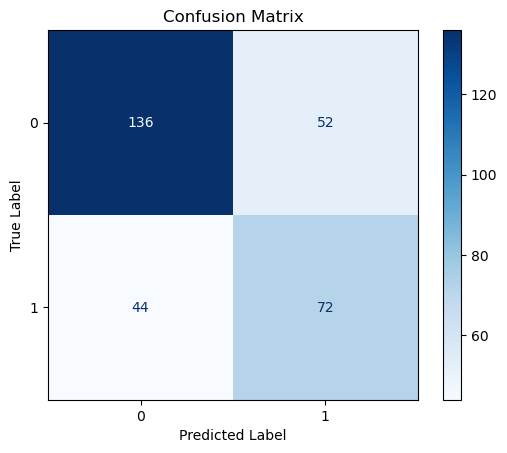

In [77]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix

cm = confusion_matrix(y_test_preprocessed, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot confusion matrix
disp.plot(cmap="Blues")

# add title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

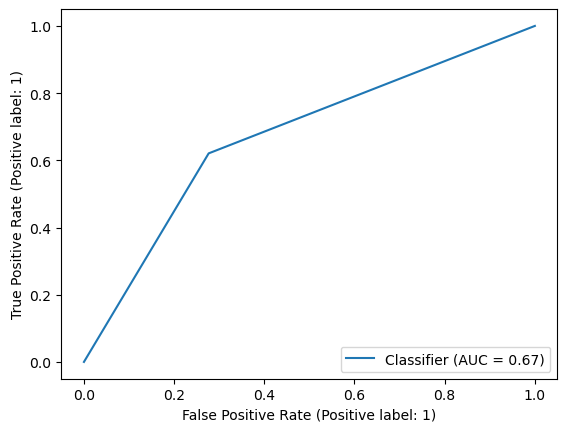

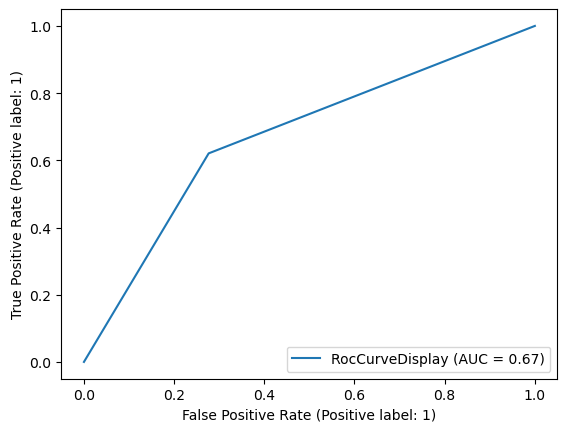

In [78]:
from sklearn.metrics import RocCurveDisplay

disp_roc_curve = RocCurveDisplay.from_predictions(
    y_true=y_test_preprocessed, y_pred=y_pred_binary
)

# plot roc curve
disp_roc_curve.plot(name="RocCurveDisplay")

plt.show()

### Hyperparameter tuning: Grid Search and Cross validation
* create a default XGBoost classifier.
* create the Kfold object. You can use tratifiedKFold from sklearn.model_selection.
* create the grid search object. You can use RandomizedSearchCV from sklearn.model_selection.
* fit grid search.

In [79]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# Create DMatrix
x_DMatrix = xgb.DMatrix(X_preprocessed, label=y_preprocessed)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "n_estimators": [50, 100, 200, 500],
    "gamma": [0, 0.1, 0.5, 1],
    "subsample": [0.5, 0.7, 1],
    "colsample_bytree": [0.5, 0.7, 1],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0, 0.1, 0.5, 1],
}

# Create the grid search object
grid_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=92847,
    refit=True,
    verbose=1,
)

# Fit the grid search object
grid_search.fit(X_train_preprocessed, y_train_preprocessed)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'subsample': 0.5, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best Score: 0.7081157660392633


### Assessing model performance using the best model from grid search
#### Print Train Accuracy, Test Accuracy and Classification Report.

In [80]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Get the best model from grid search
xgb_best_model = xgb.XGBClassifier(**grid_search.best_params_)
xgb_best_model.fit(X_train_preprocessed, y_train_preprocessed)

# Make predictions on the train and test data using the best model
y_train_pred = xgb_best_model.predict(X_train_preprocessed)
y_test_pred = xgb_best_model.predict(X_test_preprocessed)

# Evaluate the accuracy of the model on the train and test data
train_accuracy = accuracy_score(y_train_preprocessed, y_train_pred)
test_accuracy = accuracy_score(y_test_preprocessed, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

model_comparison_dict['GridSearchXGB'] = test_accuracy

# Print the classification report
xgb_clf_report = classification_report(
    y_test_preprocessed, y_test_pred, output_dict=True
)
pd.DataFrame(xgb_clf_report)

Train Accuracy: 0.8445723684210527
Test Accuracy: 0.6973684210526315


,0,1,accuracy,macro avg,weighted avg
precision,0.742424,0.613208,0.697368,0.677816,0.693118
recall,0.781915,0.560345,0.697368,0.671130,0.697368
f1-score,0.761658,0.585586,0.697368,0.673622,0.694472
support,188.000000,116.000000,0.697368,304.000000,304.000000


In [81]:
# Comparison Between Models Trained So Far
pd.DataFrame(model_comparison_dict, index=['Accuracy'])

,DefaultRandomForest,GridSearchRandomForest,ImprovedRandomForest,GridSearchXGB
Accuracy,0.694079,0.684211,0.703947,0.697368


### Create the feature importances plot, plot a decision tree from the booster.

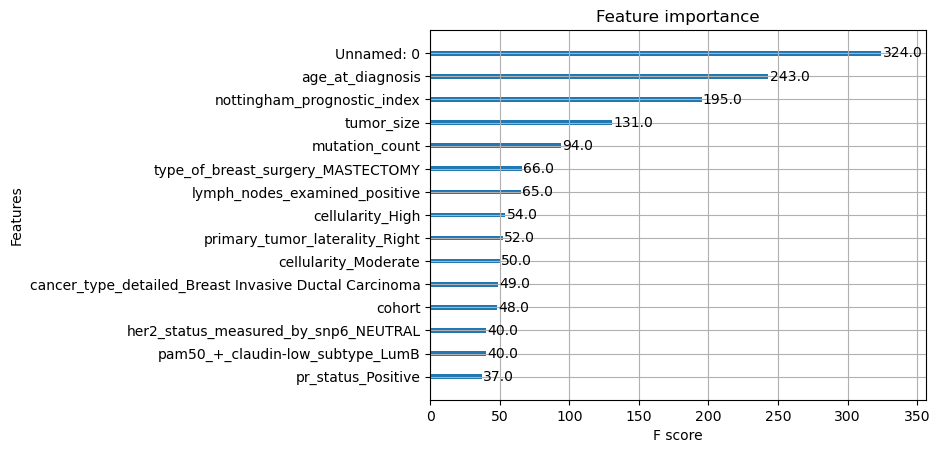

In [82]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot the feature importances
plot_importance(xgb_best_model, max_num_features=15)
plt.show()

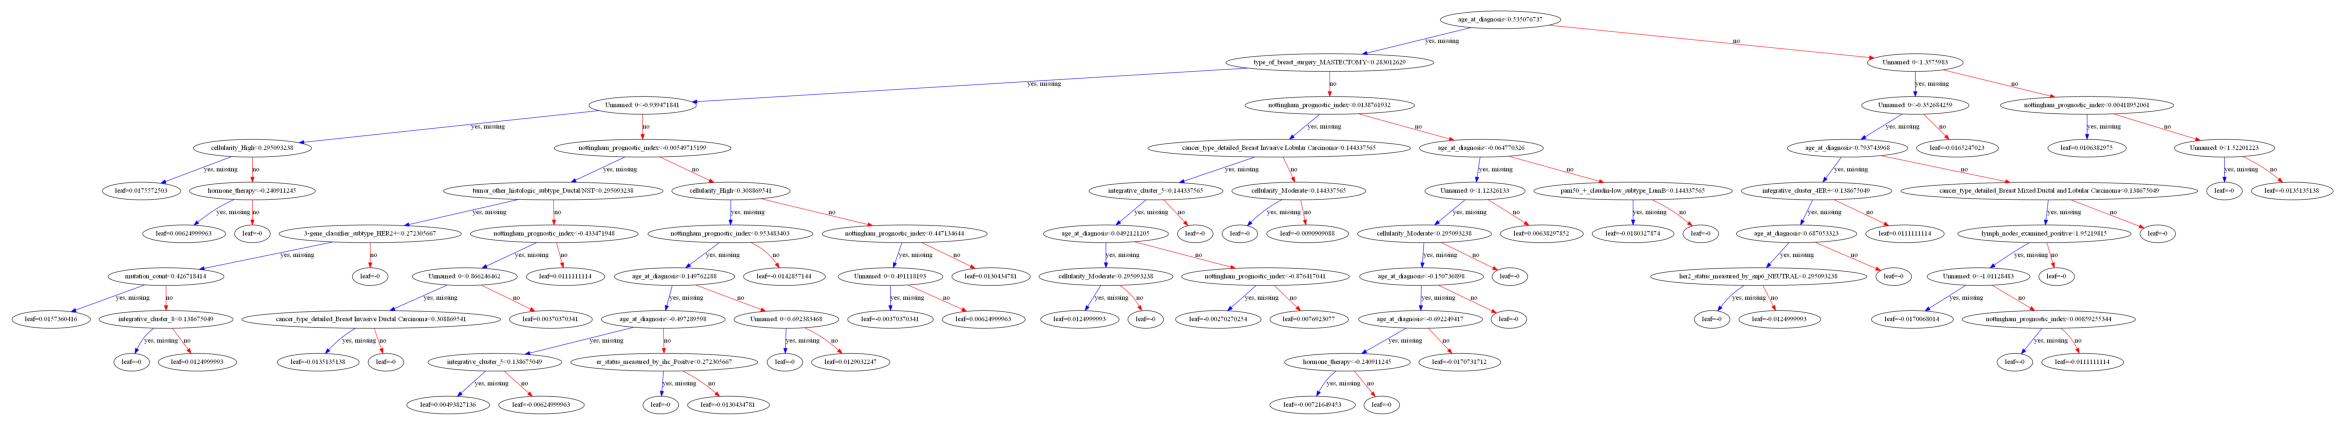

In [83]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_best_model, ax=ax)
plt.savefig("./decision_tree.png", dpi=600)
plt.show()

### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. You can implement your model and compare the results.

We try to improve the model using parameter regularization. We adjust the regularization parameters of the XGBoost model to reduce overfitting and improve generalization performance. For example, we could increase the values of the reg_alpha and reg_lambda hyperparameters.


In [84]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import (
    RandomizedSearchCV,
)
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "n_estimators": [50, 100, 200, 500],
    "gamma": [0, 0.1, 0.5, 1],
    "subsample": [0.5, 0.7, 1],
    "colsample_bytree": [0.5, 0.7, 1],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0, 0.1, 0.5, 1],
}

# Create the grid search object
grid_search_impr = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=83728,
    verbose=1,
    refit=True,
)

# Fit the grid search object
grid_search_impr.fit(X_train_preprocessed, y_train_preprocessed)

# Get the best model from grid search
best_model_impr = xgb.XGBClassifier(**grid_search_impr.best_params_)
best_model_impr.fit(X_train_preprocessed, y_train_preprocessed)

# Make predictions on the train and test data using the best model
y_train_pred = best_model_impr.predict(X_train_preprocessed)
y_test_pred = best_model_impr.predict(X_test_preprocessed)

# Evaluate the accuracy of the model on the train and test data
train_accuracy = accuracy_score(y_train_preprocessed, y_train_pred)
test_accuracy = accuracy_score(y_test_preprocessed, y_test_pred)

model_comparison_dict['ImprovedXGB'] = test_accuracy

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

xgb_improved_clf_report = classification_report(
    y_test_preprocessed, y_test_pred, output_dict=True
)
pd.DataFrame(xgb_improved_clf_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Train Accuracy: 0.796875
Test Accuracy: 0.6907894736842105


,0,1,accuracy,macro avg,weighted avg
precision,0.747368,0.596491,0.690789,0.671930,0.689797
recall,0.755319,0.586207,0.690789,0.670763,0.690789
f1-score,0.751323,0.591304,0.690789,0.671314,0.690263
support,188.000000,116.000000,0.690789,304.000000,304.000000


## Comparison between XGBoost and Random Forest Classifier

Compare the results from these two models. How Would you rate each method in terms of its performance? What's the difference between these models? explain.


#### Performance:
Here is an overall comparison on the performance of models we trained in this homework:

In [85]:
# Comparison Between Models Trained So Far
pd.DataFrame(model_comparison_dict, index=['Accuracy'])

,DefaultRandomForest,GridSearchRandomForest,ImprovedRandomForest,GridSearchXGB,ImprovedXGB
Accuracy,0.694079,0.684211,0.703947,0.697368,0.690789


It seems that both XGBoost and Random Forest had moderate performance on this dataset. From the accuracy report, none of the models outperformed the other. Also, it appears that both random forest and XGBoost performed as-well as the best model obtained using grid-search and other techniques like bagging. 

In general, XGBoost tends to perform slightly better than Random Forest Classifier on many datasets, especially when the dataset is large and complex. XGBoost is known for its ability to handle high-dimensional data and learn complex interactions between features.

However, Random Forest Classifier can sometimes perform better than XGBoost on smaller datasets or datasets with simpler relationships between features. Random Forest Classifier is also known for its ability to handle noisy data and outliers.

#### Difference between models:

The main difference between XGBoost and Random Forest Classifier is in how they build their decision trees.

Random Forest Classifier builds decision trees independently of each other, using a random subset of the features at each split. This helps to reduce overfitting and increase the diversity of the trees in the ensemble.

XGBoost builds decision trees sequentially, using the residuals of the previous trees to guide the construction of the next tree. This allows XGBoost to focus on the samples that are most difficult to classify and can lead to better performance.

XGBoost also includes additional regularization parameters, such as L1 and L2 regularization, that can help to further reduce overfitting and improve generalization performance.

Another difference is that XGBoost uses a gradient boosting approach, while Random Forest Classifier uses a bagging approach. This means that XGBoost tries to minimize the errors of the previous trees, while Random Forest Classifier tries to reduce the variance of the ensemble by averaging the predictions of the trees.

#### Conclusion
Overall, both XGBoost and Random Forest Classifier are powerful methods that can be effective for classification tasks. On this specific dataset, both models had very similar performance. 